In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import matplotlib as mpl ; mpl.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from mpl_toolkits import mplot3d
plt.rc('axes', unicode_minus=False)

In [3]:
epl=pd.read_csv('/content/gdrive/My Drive/epl.csv')
epl2=pd.read_csv('/content/gdrive/My Drive/epl2.csv')
epl2 = epl2[(epl2['tournament']=='Premier League') & (epl2['season'].isin(['2018/2019', '2019/2020']))].reset_index(drop=True)
movies=pd.read_csv('/content/gdrive/My Drive/movies.csv')
movie = movies.dropna(axis=0)

In [4]:

%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [5]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 0.98, 'Several Plot')

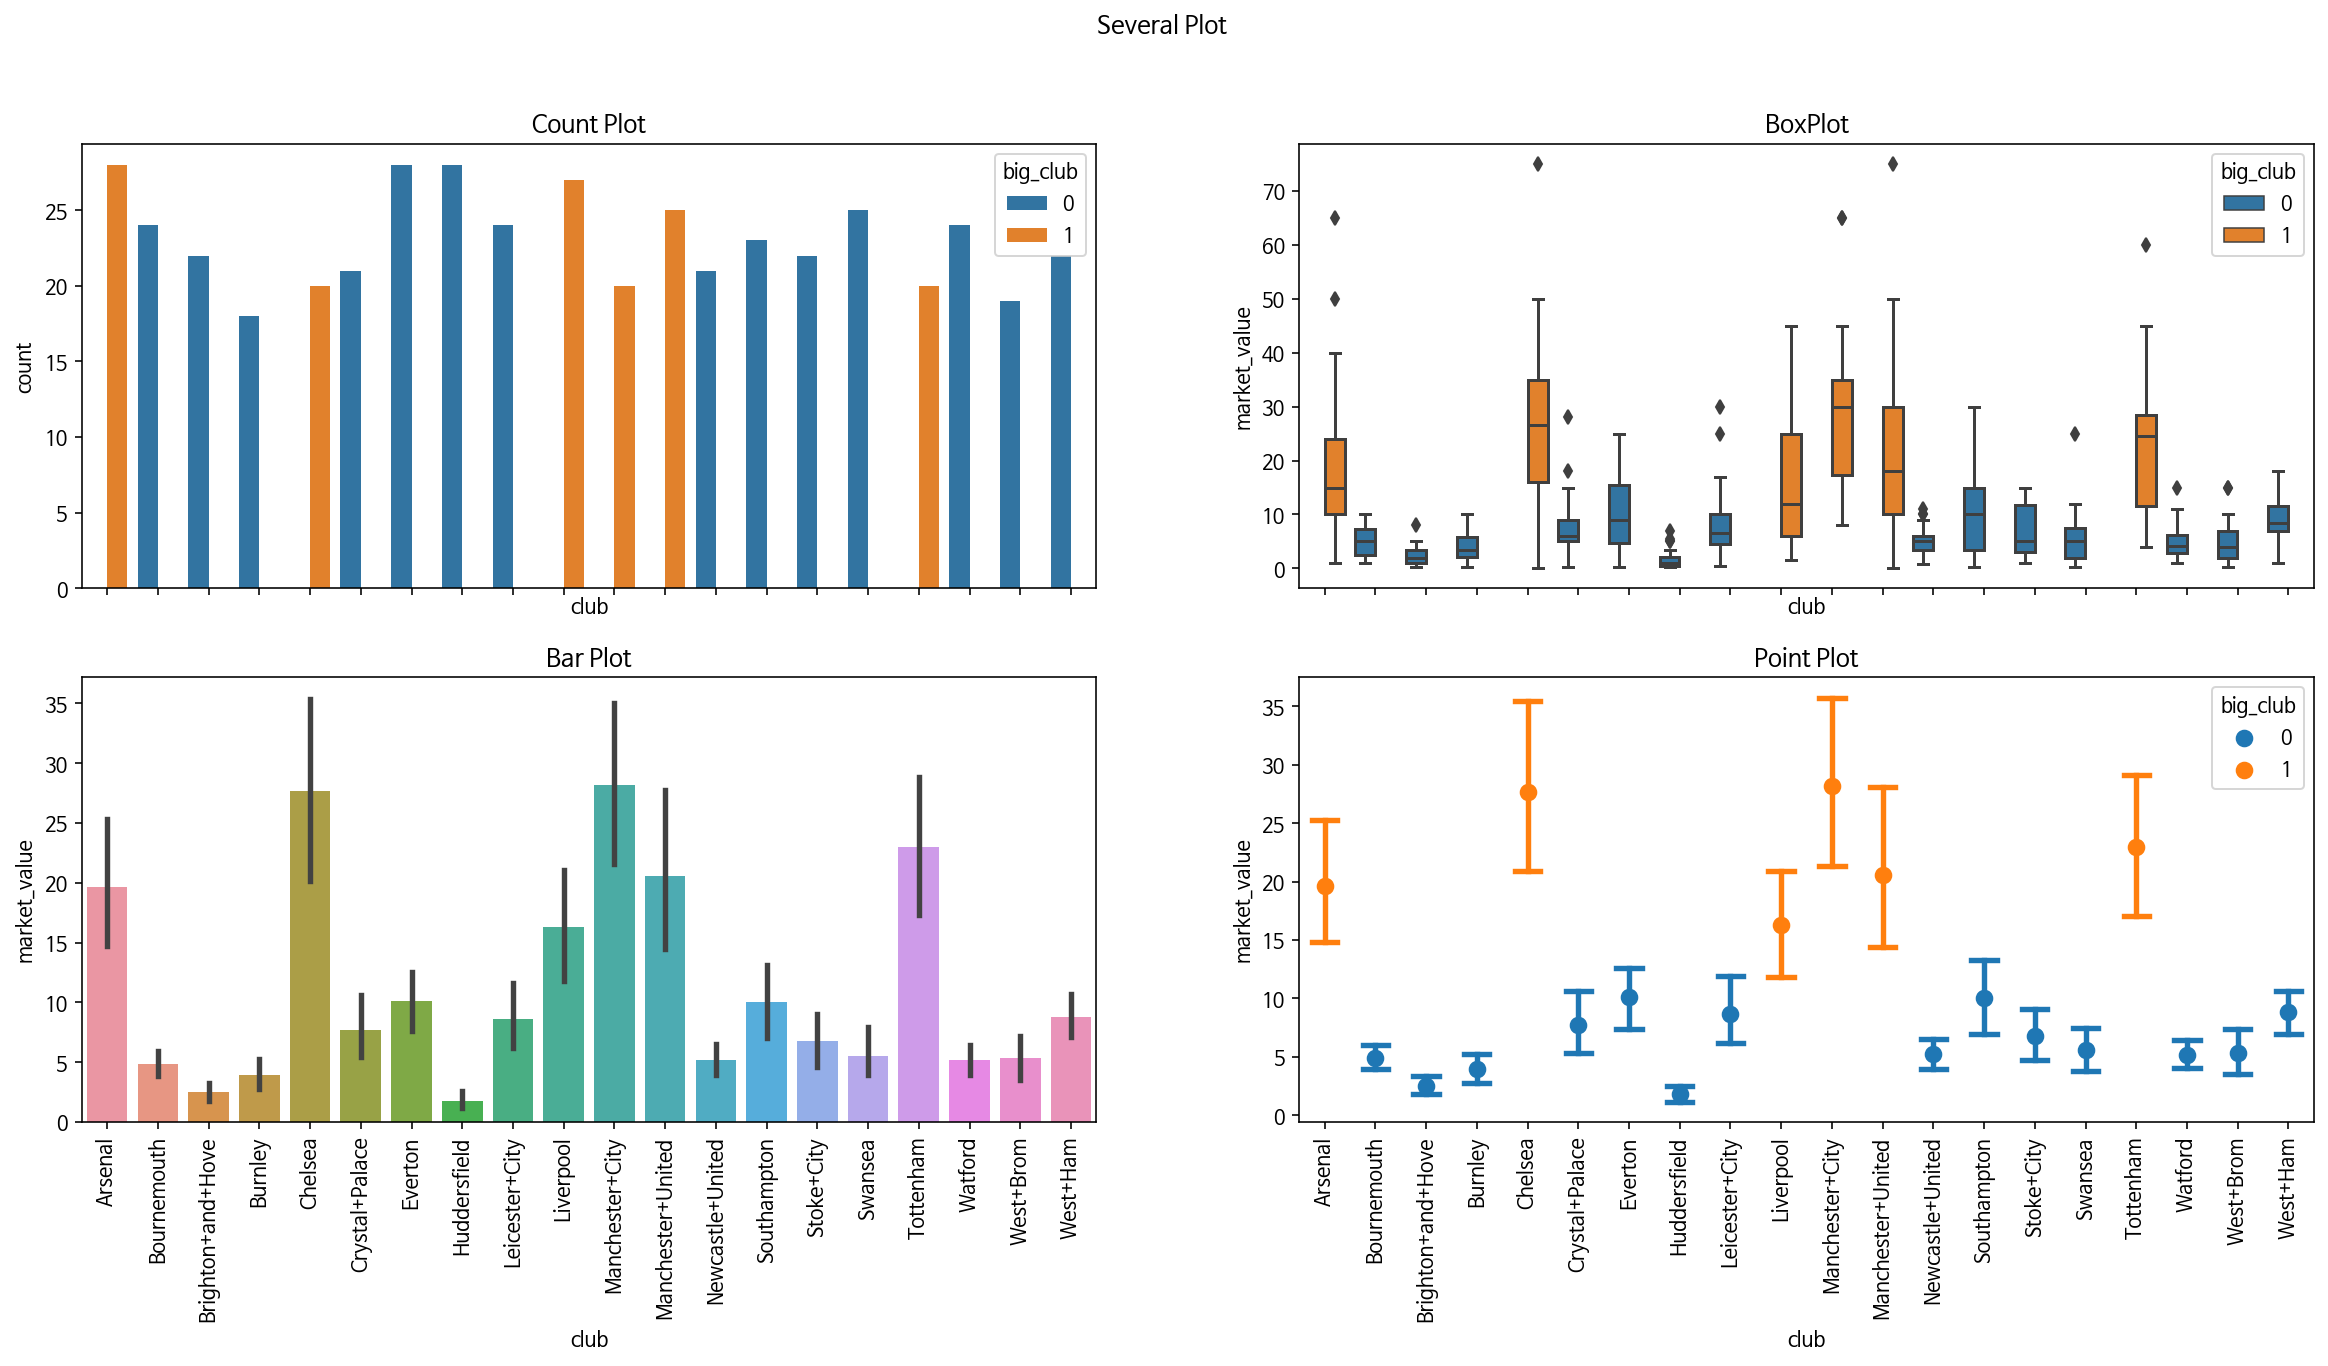

In [6]:
#quiz1
fig, ax = plt.subplots(2,2, sharex=True, sharey=False, figsize=(20,9))
sns.countplot(x='club', data=epl, hue='big_club', ax=ax[0, 0])
ax[0,0].set_title('Count Plot')
sns.boxplot(x='club', y='market_value', data=epl, hue='big_club',ax=ax[0, 1])
ax[0,1].set_title('BoxPlot')
sns.barplot(x='club', y='market_value', data=epl, ax=ax[1, 0])
ax[1,0].set_title('Bar Plot')
ax[1,0].set_xticklabels(labels=epl['club'].unique(),rotation=90)
sns.pointplot(x='club', y='market_value', data=epl, hue='big_club', capsize=0.5, join=False,ax=ax[1,1])
ax[1,1].set_title('Point Plot')
ax[1,1].set_xticklabels(labels=epl['club'].unique(),rotation=90)
fig.suptitle('Several Plot')

In [ ]:
sns.set(style="whitegrid", font="NanumGothic")

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


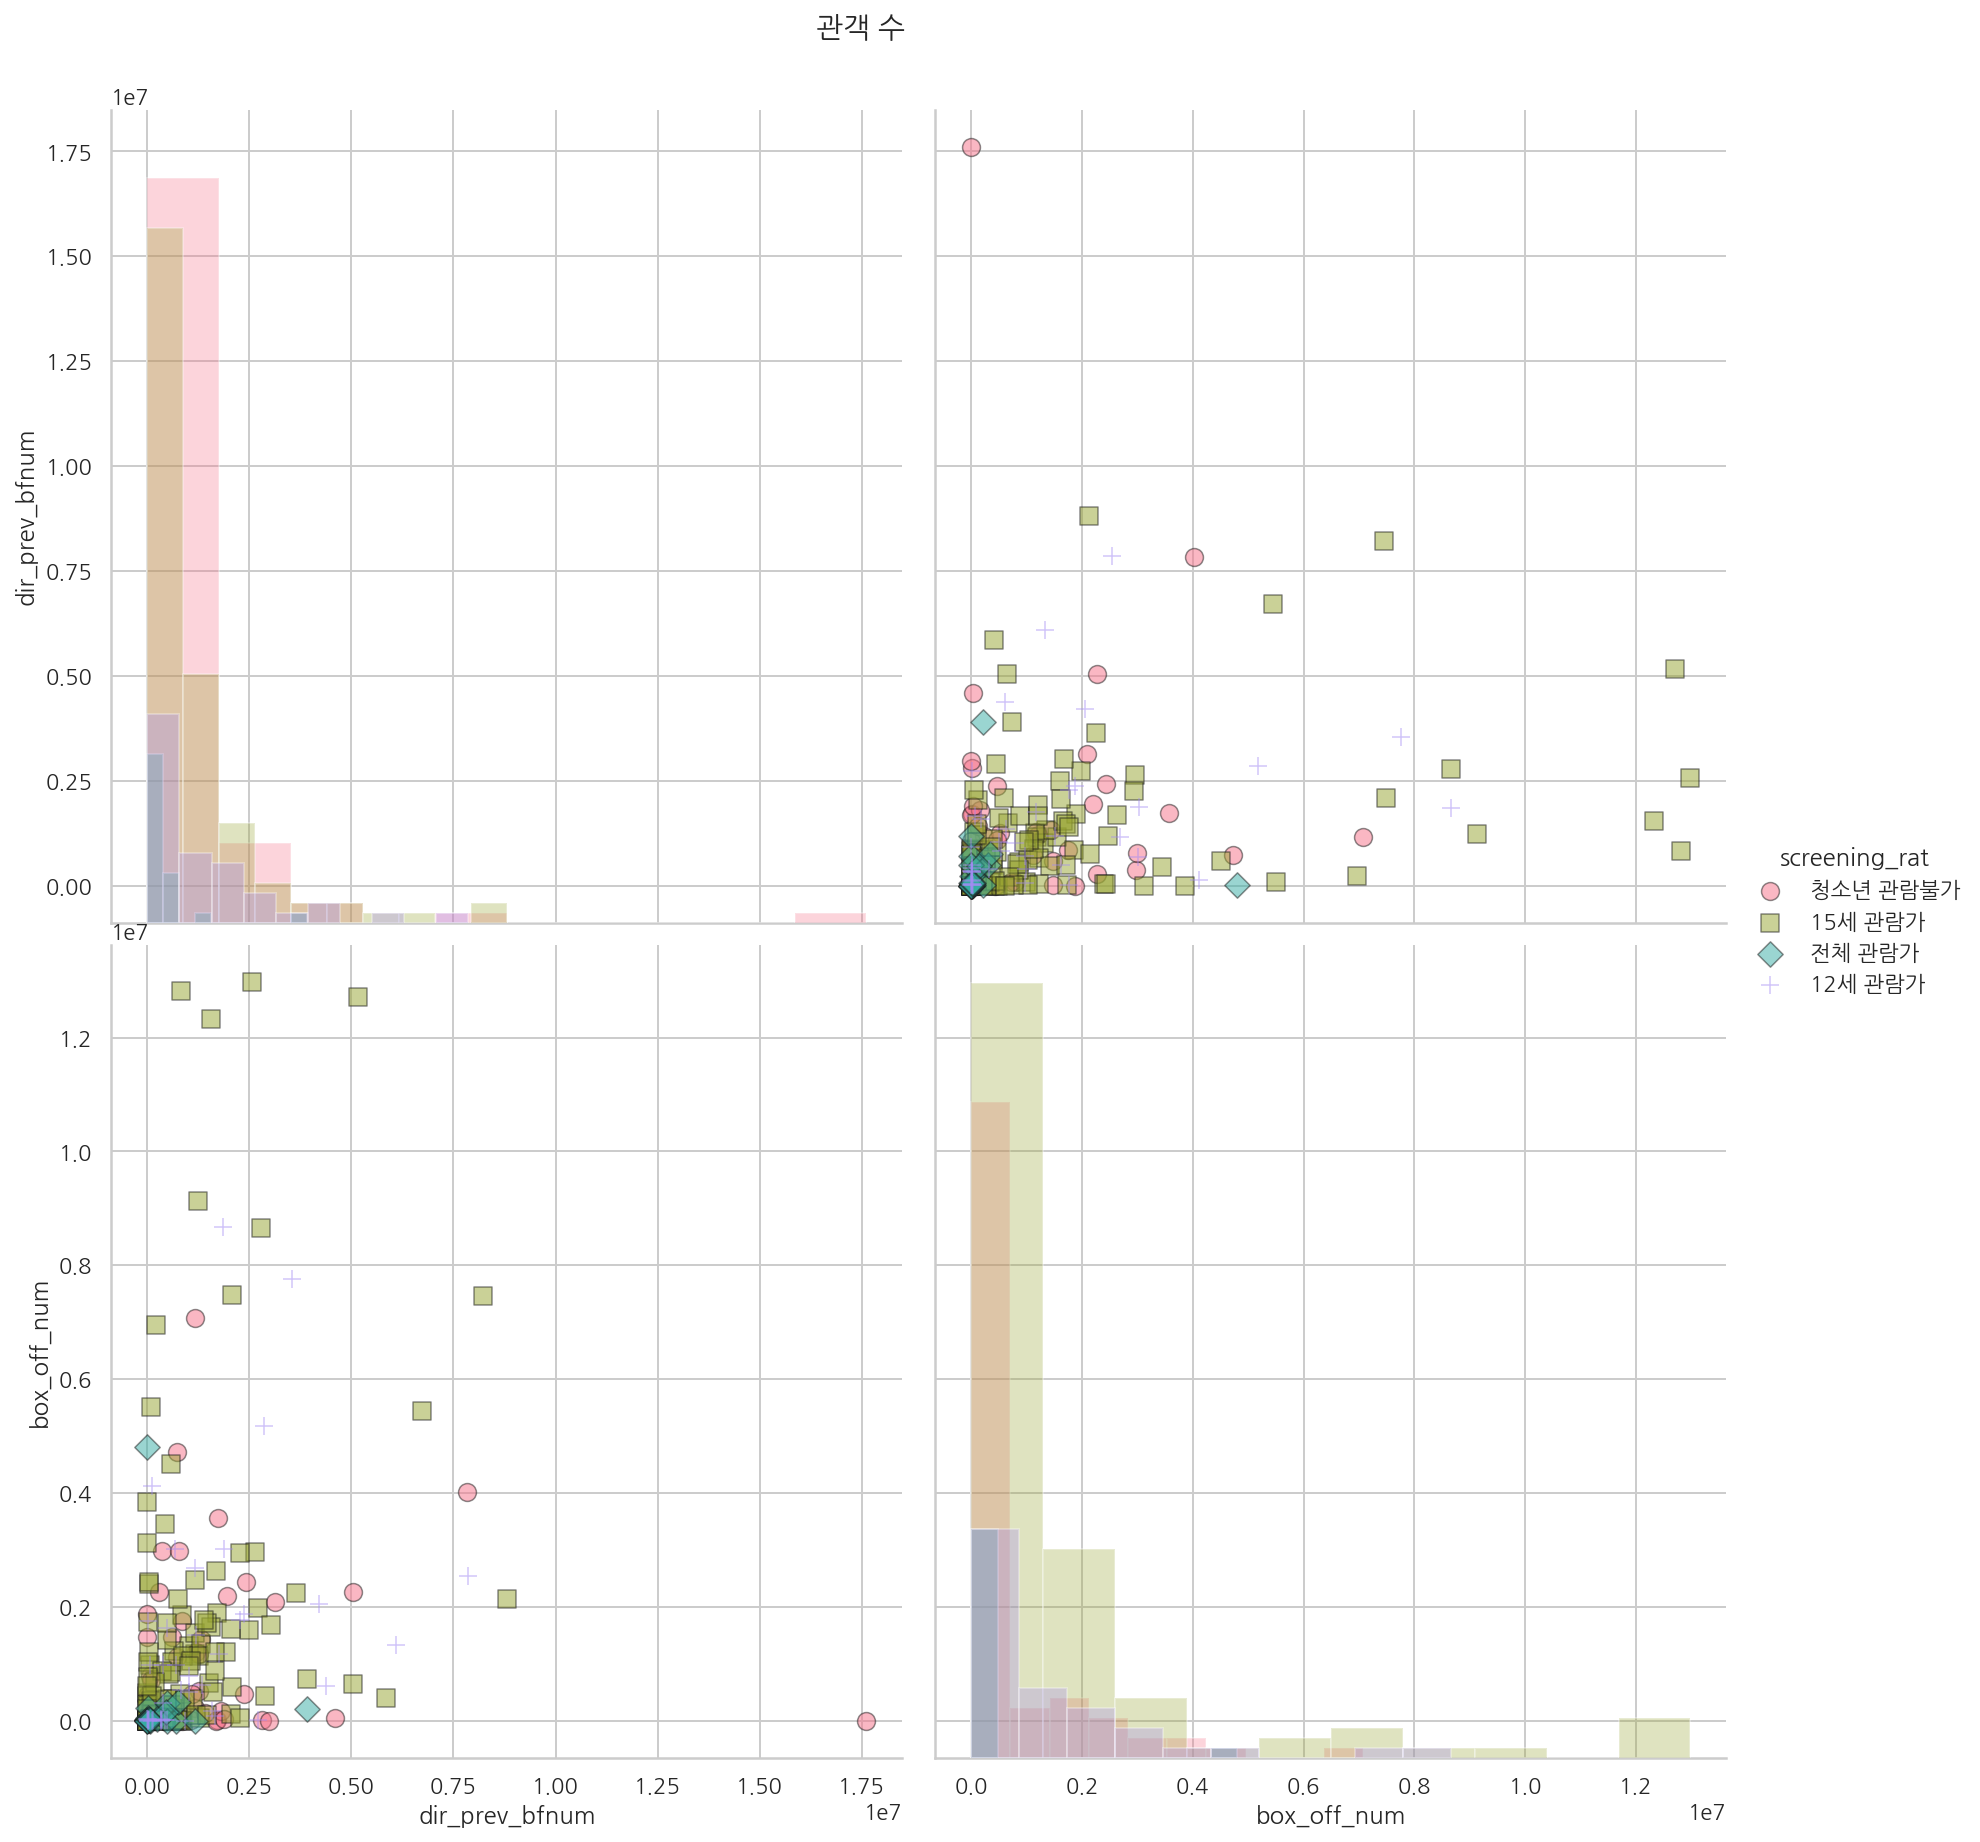

In [ ]:
#quiz2
a = sns.pairplot(data=movie[['dir_prev_bfnum', 'box_off_num','screening_rat']], hue='screening_rat',
diag_kind = 'hist', plot_kws = {'alpha':0.5, 's': 80, 'edgecolor':'k'}, diag_kws = {'alpha':0.3}, palette='husl', markers=['o', 's', 'D', '+'], size = 6)
a.fig.suptitle('관객 수', x=0.43, y=1.05)
plt.show()

In [ ]:
## pairplot 명령어 꿀팁
* diag_kind = ' ___'
* plot_kws = {'alpha':0.5, 's': 80, 'edgecolor':'k'}
* dias_kws = {'alpha':0.3}
(kws = keyword arguments)
* pallete='  '
* markers=[' ', ' ', ' ', ' ']
* size = 6

In [58]:
data1=pd.read_excel('/content/gdrive/My Drive/2020빅콘테스트 문제데이터(데이터분석분야-챔피언리그)/01_제공데이터/2020 빅콘테스트 데이터분석분야-챔피언리그_2019년 실적데이터.xlsx',header=1)
data2=pd.read_excel('/content/gdrive/My Drive/2020빅콘테스트 문제데이터(데이터분석분야-챔피언리그)/01_제공데이터/2020 빅콘테스트 데이터분석분야-챔피언리그_시청률 데이터.xlsx',header=1)
data3=pd.read_excel('/content/gdrive/My Drive/2020빅콘테스트 문제데이터(데이터분석분야-챔피언리그)/02_평가데이터/2020 빅콘테스트 데이터분석분야-챔피언리그_2020년 6월 판매실적예측데이터(평가데이터).xlsx',header=1)

In [8]:
data1

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 06:00:00,20.000000,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01 06:20:00,20.000000,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0
4,2019-01-01 06:40:00,20.000000,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0
...,...,...,...,...,...,...,...,...
38304,2020-01-01 00:20:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38305,2020-01-01 00:40:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38306,2020-01-01 01:00:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38307,2020-01-01 01:20:00,20.000000,100490,201478,더케이 예다함 상조서비스(티포트),무형,0,NaN


In [36]:
data1['판매량']=data1['취급액']/data1['판매단가']
data1

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,판매량
0,2019-01-01 06:00:00,20.000000,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,52.606516
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,109.548872
2,2019-01-01 06:20:00,20.000000,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,81.754386
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.310777
4,2019-01-01 06:40:00,20.000000,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.218045
...,...,...,...,...,...,...,...,...,...
38304,2020-01-01 00:20:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN,NaN
38305,2020-01-01 00:40:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN,NaN
38306,2020-01-01 01:00:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN,NaN
38307,2020-01-01 01:20:00,20.000000,100490,201478,더케이 예다함 상조서비스(티포트),무형,0,NaN,NaN


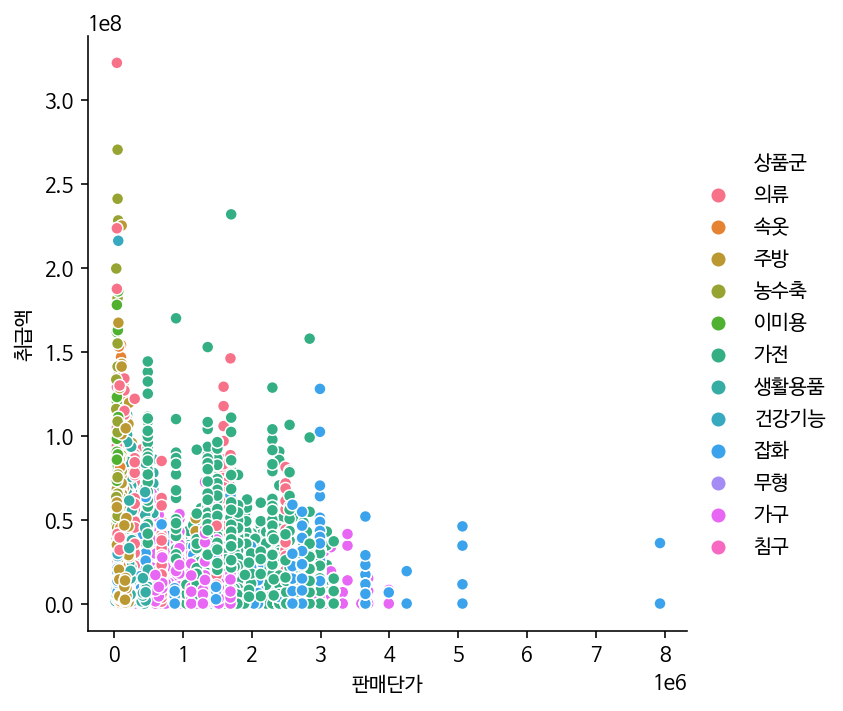

In [10]:
sns.relplot(x='판매단가', y='취급액', data=data1, kind='scatter', hue='상품군')
plt.show()

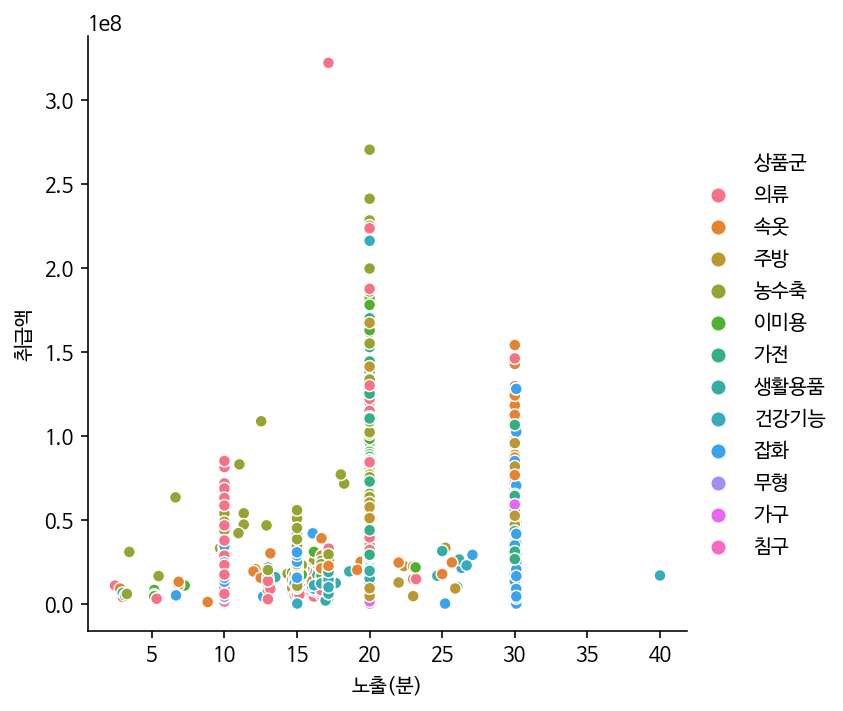

In [11]:
sns.relplot(x='노출(분)', y='취급액', data=data1, kind='scatter', hue='상품군')
plt.show()

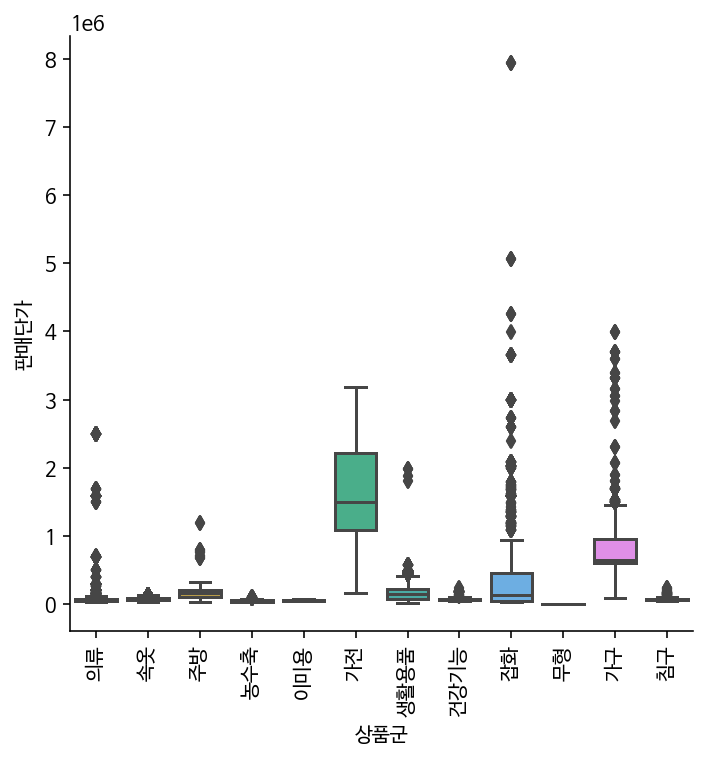

In [12]:
a=sns.catplot(x='상품군',y='판매단가',kind='box',data=data1)
a.set_xticklabels(rotation=90)
plt.show()

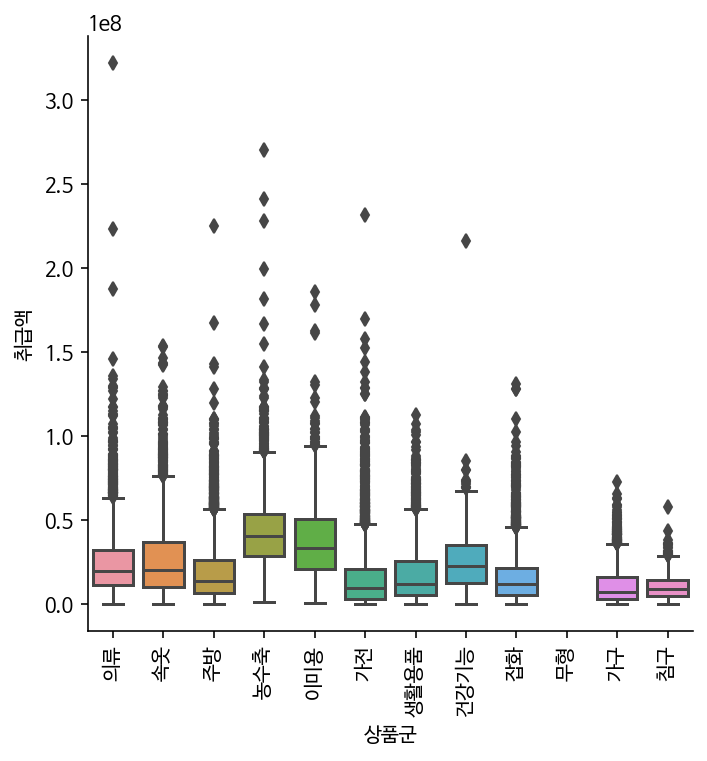

In [ ]:
a=sns.catplot(x='상품군',y='취급액',kind='box',data=data1)
a.set_xticklabels(rotation=90)
plt.show()

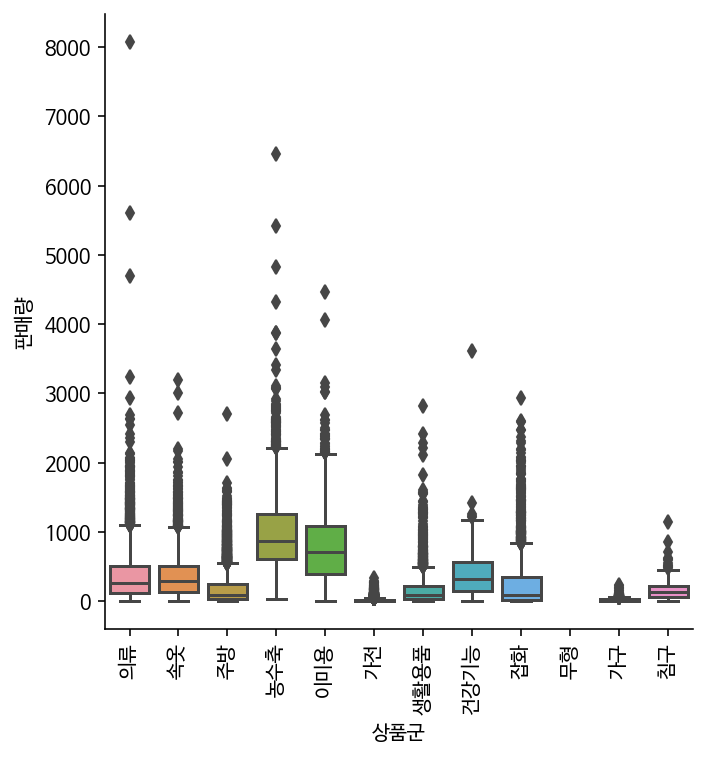

In [ ]:
a=sns.catplot(x='상품군',y='판매량',kind='box',data=data1)
a.set_xticklabels(rotation=90)
plt.show()

In [16]:
group1 = data1.groupby(['상품군'])['판매단가'].mean()
group1

상품군
가구      8.434763e+05
가전      1.631382e+06
건강기능    8.332430e+04
농수축     4.641954e+04
무형      0.000000e+00
생활용품    1.864539e+05
속옷      7.798127e+04
의류      1.554892e+05
이미용     5.103004e+04
잡화      4.694785e+05
주방      1.524328e+05
침구      7.856951e+04
Name: 판매단가, dtype: float64

[Text(0, 0, '가구'),
 Text(0, 0, '가전'),
 Text(0, 0, '건강기능'),
 Text(0, 0, '농수축'),
 Text(0, 0, '무형'),
 Text(0, 0, '생활용품'),
 Text(0, 0, '속옷'),
 Text(0, 0, '의류'),
 Text(0, 0, '이미용'),
 Text(0, 0, '잡화'),
 Text(0, 0, '주방'),
 Text(0, 0, '침구')]

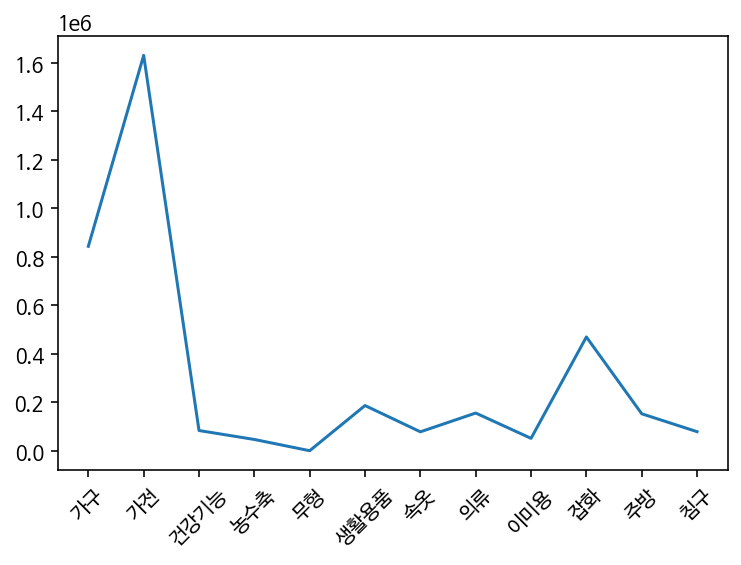

In [17]:
fig, ax = plt.subplots()
ax.plot(group1.index, group1)
ax.set_xticklabels(group1.index, rotation=45)

In [19]:
group2 = data1.groupby(['상품군'])['취급액'].mean()
group2

상품군
가구      1.115025e+07
가전      1.499100e+07
건강기능    2.544787e+07
농수축     4.272457e+07
무형               NaN
생활용품    1.795182e+07
속옷      2.607730e+07
의류      2.437871e+07
이미용     3.779511e+07
잡화      1.601016e+07
주방      1.920993e+07
침구      1.045115e+07
Name: 취급액, dtype: float64

[Text(0, 0, '가구'),
 Text(0, 0, '가전'),
 Text(0, 0, '건강기능'),
 Text(0, 0, '농수축'),
 Text(0, 0, '무형'),
 Text(0, 0, '생활용품'),
 Text(0, 0, '속옷'),
 Text(0, 0, '의류'),
 Text(0, 0, '이미용'),
 Text(0, 0, '잡화'),
 Text(0, 0, '주방'),
 Text(0, 0, '침구')]

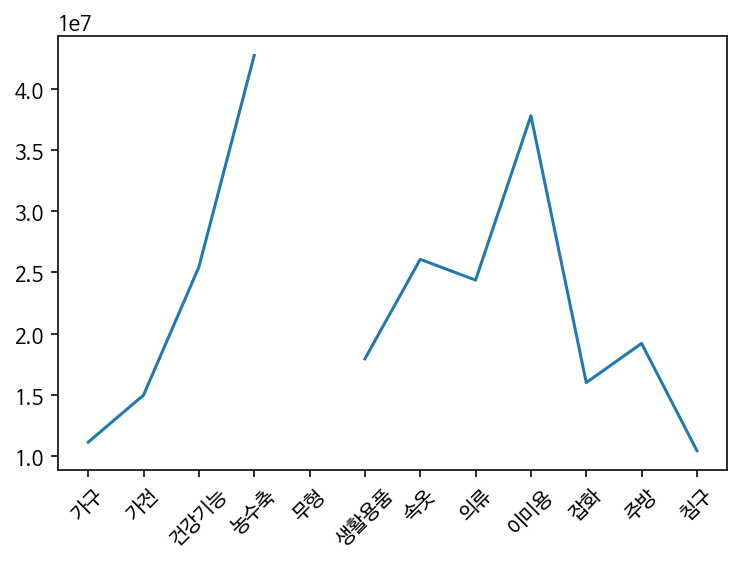

In [20]:
fig, ax = plt.subplots()
ax.plot(group2.index, group2)
ax.set_xticklabels(group2.index, rotation=45)

In [21]:
group3 = data1.groupby(['상품군'])['판매량'].mean()
group3

상품군
가구       17.379483
가전       15.463927
건강기능    372.739295
농수축     972.194409
무형             NaN
생활용품    174.314027
속옷      363.624486
의류      384.164614
이미용     801.696335
잡화      237.786101
주방      189.733096
침구      153.908400
Name: 판매량, dtype: float64

[Text(0, 0, '가구'),
 Text(0, 0, '가전'),
 Text(0, 0, '건강기능'),
 Text(0, 0, '농수축'),
 Text(0, 0, '무형'),
 Text(0, 0, '생활용품'),
 Text(0, 0, '속옷'),
 Text(0, 0, '의류'),
 Text(0, 0, '이미용'),
 Text(0, 0, '잡화'),
 Text(0, 0, '주방'),
 Text(0, 0, '침구')]

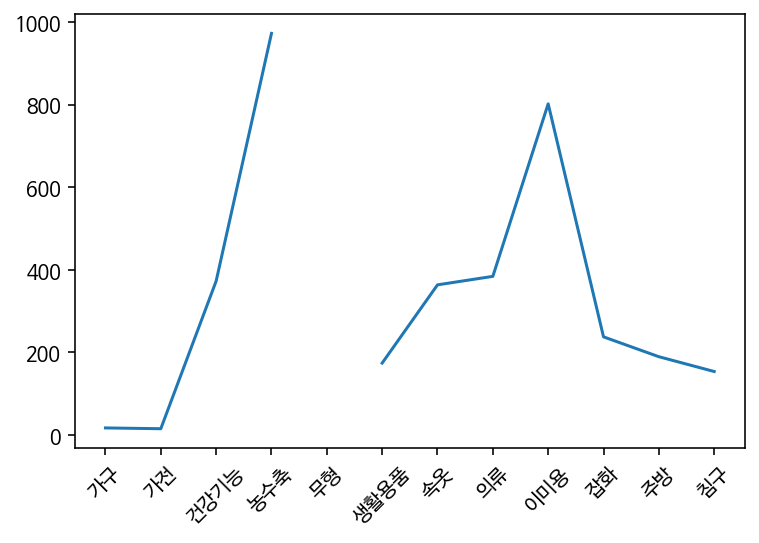

In [22]:
fig, ax = plt.subplots()
ax.plot(group3.index, group3)
ax.set_xticklabels(group3.index, rotation=45)

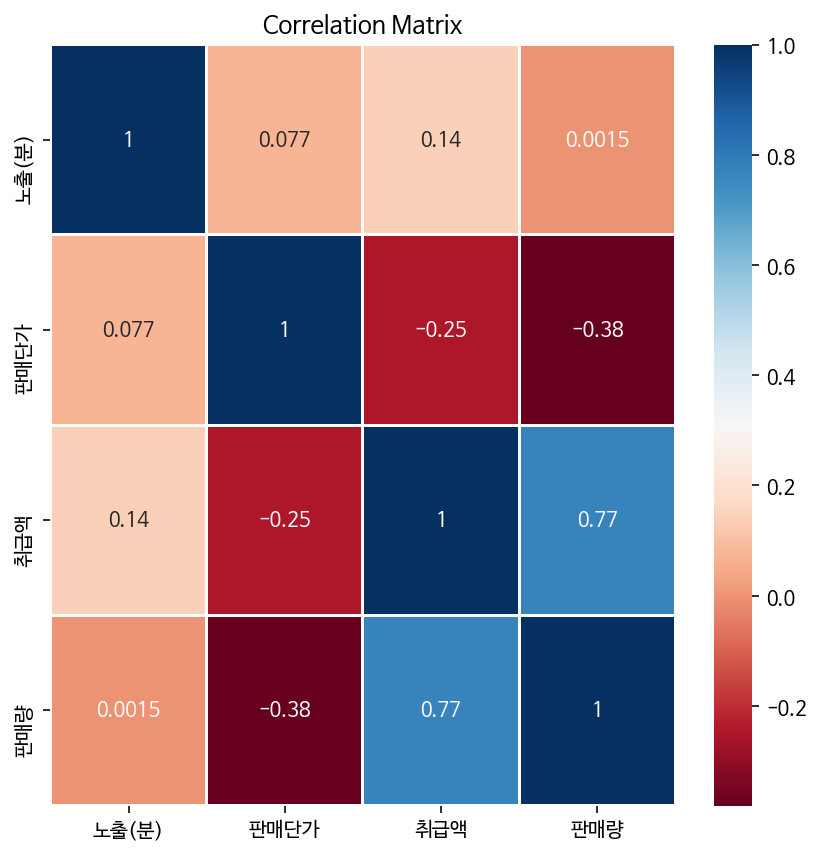

In [23]:
data1['마더코드']=data1['마더코드'].astype('category')
data1['상품코드']=data1['상품코드'].astype('category')

fig, ax = plt.subplots(figsize=(7, 7))
a = sns.heatmap(data1.corr(), annot=True, linewidths=1, cmap='RdBu')
ax.set_title('Correlation Matrix')
plt.show()

In [59]:
data2

,시간대,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-12,2019-01-13,2019-01-14,2019-01-15,2019-01-16,2019-01-17,2019-01-18,2019-01-19,2019-01-20,2019-01-21,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-26,2019-01-27,2019-01-28,2019-01-29,2019-01-30,2019-01-31,2019-02-01,2019-02-02,2019-02-03,2019-02-04,2019-02-05,2019-02-06,2019-02-07,2019-02-08,...,2019-11-23,2019-11-24,2019-11-25,2019-11-26,2019-11-27,2019-11-28,2019-11-29,2019-11-30,2019-12-01,2019-12-02,2019-12-03,2019-12-04,2019-12-05,2019-12-06,2019-12-07,2019-12-08,2019-12-09,2019-12-10,2019-12-11,2019-12-12,2019-12-13,2019-12-14,2019-12-15,2019-12-16,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-21,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
0,02:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.038,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.048,0.000,0.000,0.000,0.000,0.018,0.000,0.035,0.030,0.016,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.012,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003
1,02:01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.038,0.000,...,0.000,0.000,0.000,0.000,0.000,0.022,0.000,0.000,0.000,0.000,0.048,0.000,0.000,0.000,0.000,0.018,0.000,0.035,0.030,0.016,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.012,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.012,0.003
2,02:02,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.038,0.000,...,0.000,0.000,0.000,0.000,0.000,0.022,0.000,0.000,0.000,0.000,0.033,0.000,0.000,0.000,0.000,0.018,0.018,0.035,0.067,0.016,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.012,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004
3,02:03,0.000,0.000,0.014,0.000,0.000,0.000,0.000,0.000,0.000,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.038,0.000,...,0.000,0.000,0.000,0.000,0.000,0.022,0.000,0.000,0.000,0.000,0.033,0.000,0.000,0.000,0.000,0.018,0.018,0.035,0.067,0.016,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.012,0.000,0.000,0.000,0.000,0.017,0.000,0.000,0.000,0.000,0.000,0.000,0.004
4,02:04,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.038,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.012,0.033,0.000,0.000,0.000,0.000,0.018,0.000,0.035,0.067,0.016,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.012,0.000,0.000,0.000,0.000,0.017,0.000,0.000,0.000,0.000,0.000,0.000,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,01:56,0.000,0.000,0.000,0.000,0.027,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.045,0.000,0.032,...,0.000,0.000,0.000,0.000,0.000,0.000,0.013,0.000,0.000,0.033,0.000,0.000,0.000,0.000,0.070,0.000,0.036

In [60]:
data2 = data2.drop([1440], axis=0)
data2

,시간대,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-12,2019-01-13,2019-01-14,2019-01-15,2019-01-16,2019-01-17,2019-01-18,2019-01-19,2019-01-20,2019-01-21,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-26,2019-01-27,2019-01-28,2019-01-29,2019-01-30,2019-01-31,2019-02-01,2019-02-02,2019-02-03,2019-02-04,2019-02-05,2019-02-06,2019-02-07,2019-02-08,...,2019-11-23,2019-11-24,2019-11-25,2019-11-26,2019-11-27,2019-11-28,2019-11-29,2019-11-30,2019-12-01,2019-12-02,2019-12-03,2019-12-04,2019-12-05,2019-12-06,2019-12-07,2019-12-08,2019-12-09,2019-12-10,2019-12-11,2019-12-12,2019-12-13,2019-12-14,2019-12-15,2019-12-16,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-21,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
0,02:00,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.000,0.006,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.038,0.000,...,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.000,0.048,0.0,0.0,0.0,0.000,0.018,0.000,0.035,0.030,0.016,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.012,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000,0.003
1,02:01,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.005,0.000,0.0,0.0,0.000,0.0,0.000,0.006,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.038,0.000,...,0.0,0.0,0.0,0.0,0.000,0.022,0.000,0.0,0.0,0.000,0.048,0.0,0.0,0.0,0.000,0.018,0.000,0.035,0.030,0.016,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.012,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.012,0.003
2,02:02,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.005,0.000,0.0,0.0,0.000,0.0,0.000,0.006,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.038,0.000,...,0.0,0.0,0.0,0.0,0.000,0.022,0.000,0.0,0.0,0.000,0.033,0.0,0.0,0.0,0.000,0.018,0.018,0.035,0.067,0.016,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.012,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000,0.004
3,02:03,0.0,0.0,0.014,0.0,0.000,0.0,0.0,0.0,0.000,0.005,0.000,0.0,0.0,0.000,0.0,0.000,0.006,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.038,0.000,...,0.0,0.0,0.0,0.0,0.000,0.022,0.000,0.0,0.0,0.000,0.033,0.0,0.0,0.0,0.000,0.018,0.018,0.035,0.067,0.016,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.012,0.0,0.0,0.000,0.000,0.017,0.0,0.000,0.0,0.0,0.000,0.000,0.004
4,02:04,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.005,0.000,0.0,0.0,0.000,0.0,0.000,0.006,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.038,0.000,...,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.012,0.033,0.0,0.0,0.0,0.000,0.018,0.000,0.035,0.067,0.016,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.012,0.0,0.0,0.000,0.000,0.017,0.0,0.000,0.0,0.0,0.000,0.000,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,01:55,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.004,0.000,0.000,0.0,0.0,0.000,0.0,0.005,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.004,0.0,0.0,0.0,0.0,0.021,0.0,0.0,0.0,0.0,0.0,0.0,0.039,0.000,0.032,...,0.0,0.0,0.0,0.0,0.022,0.000,0.013,0.0,0.0,0.033,0.000,0.0,0.0,0.0,0.058,0.000,0.036,0.031,0.000,0.000,0.0,0.000,0.0,0.0,0.009,0.0,0.0,0.036,0.0,0.0,0.013,0.000,0.000,0.0,0.015,0.0,0.0,0.000,0.000,0.004
1436,01:56,0.0,0.0,0.000,0.0,0.027,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.005,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.004,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.045,0.000,0.032,...,0.0,0.0,0.0,0.0,0.000,0.000,0.013,0.0,0.0,0.033,0.000,0.0,0.0,0.0,0.070,0.000,0.036,0.031,0.000,0.000,0.0,0.000,0.0,0.0,0.009,0.0,0.0,0.013,0.0,0.0,0.013,0.000,0.000,0.0,0.015,0.0,0.0,0.000,

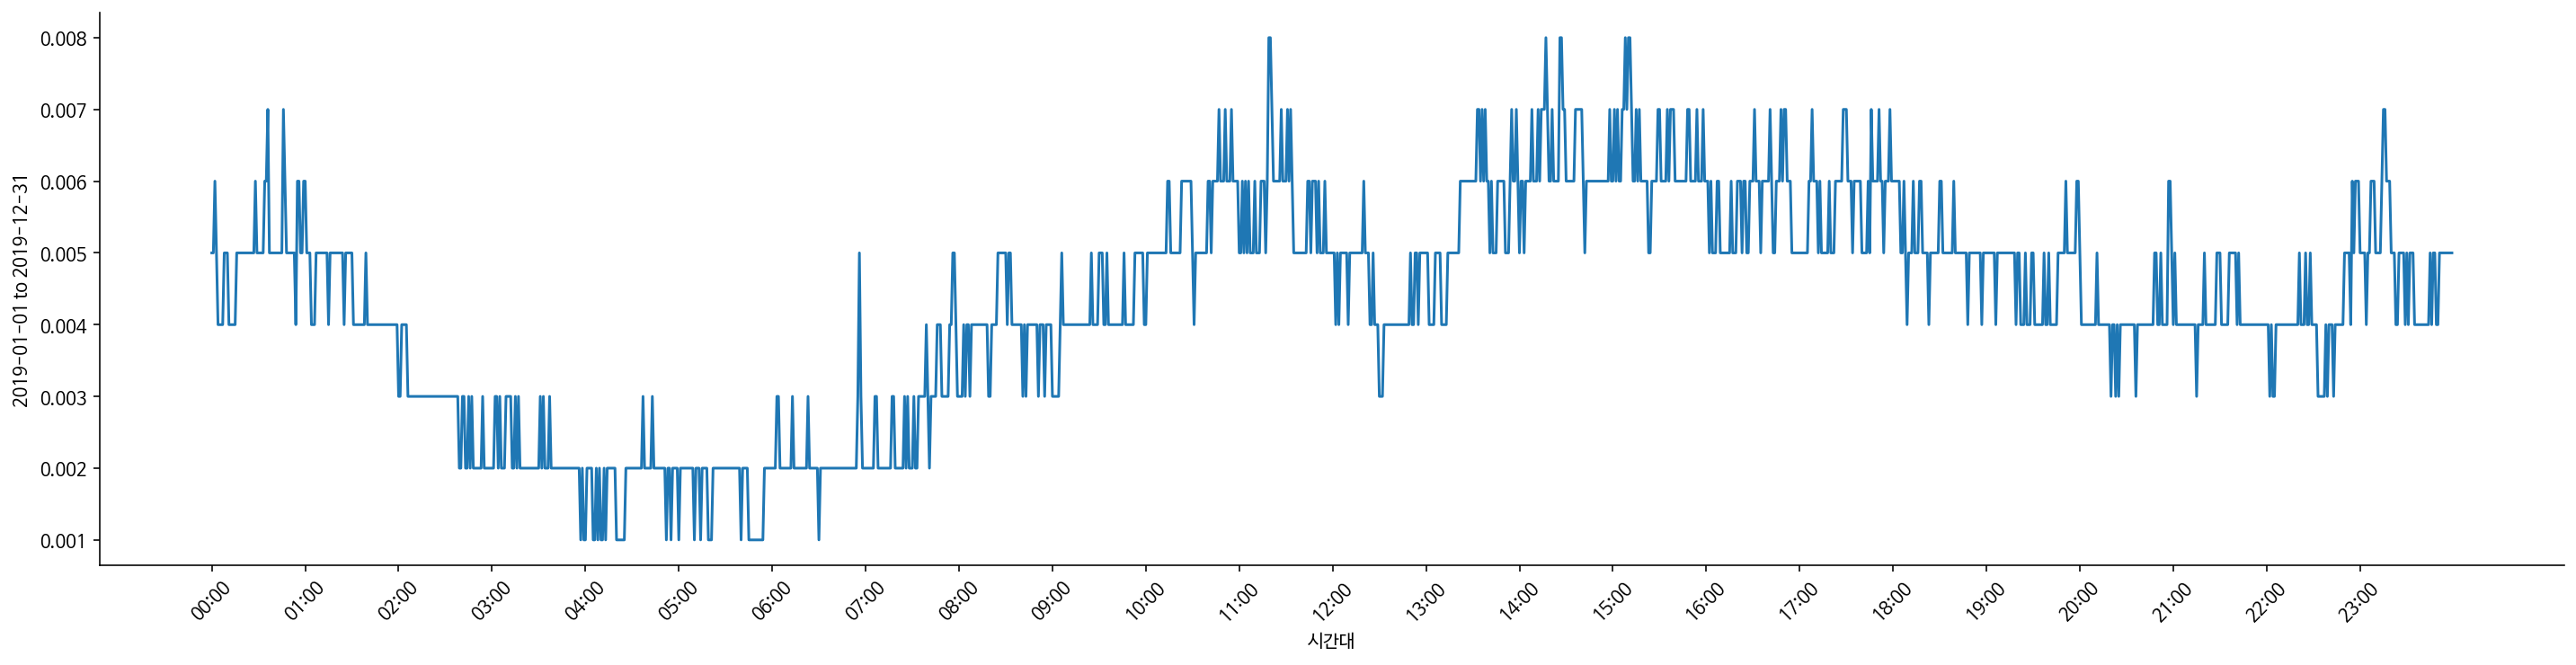

In [65]:
a = sns.relplot(x='시간대', y='2019-01-01 to 2019-12-31', data=data2, kind='line',  ci=None, aspect=4)
a.set_xticklabels(step=60,rotation=45)
plt.show()